# ================== EXPLORATORY DATA ANALYSIS ===============

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv(r'D:\KOMAL LEARNING\ELITE DATA SCIENCE\ML ORIGINAL\PROJECT 3\Project 3 Workbook Bundle\project_files\employee_data.csv')

# I. BASIC INFORMATION

In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [5]:
df.shape

(14249, 10)

In [6]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [7]:
df.dtypes[df.dtypes == 'object']

department    object
salary        object
status        object
dtype: object

# II. DISTRIBUTIONS

#### Numerical features

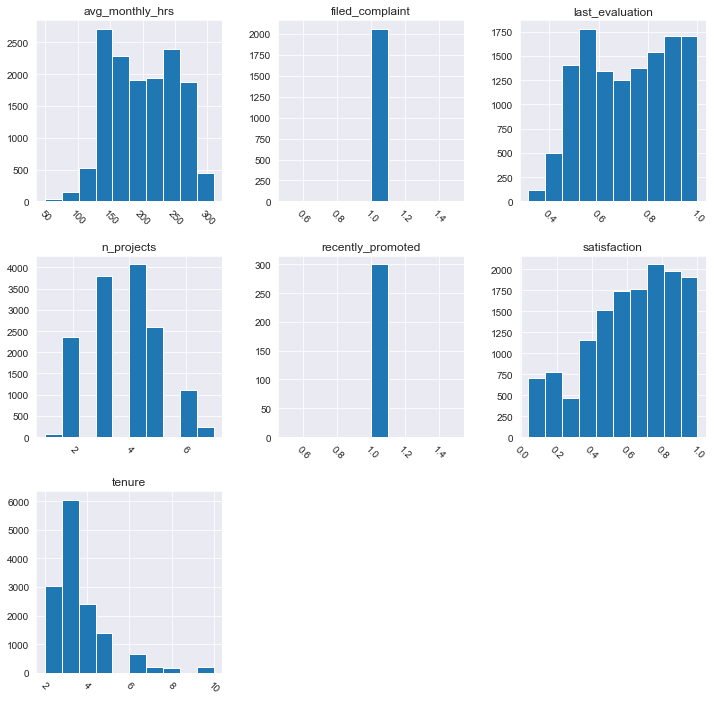

In [8]:
df.hist(figsize=(12,12),xrot=-45)
plt.show()

In [9]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


#### Categorical features

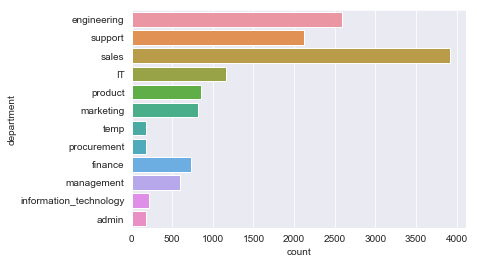

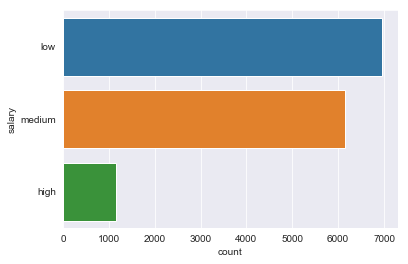

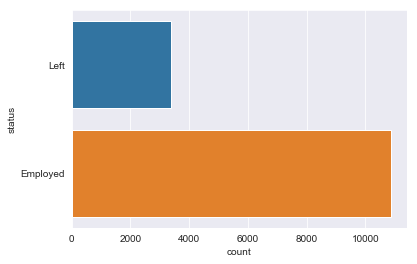

In [10]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature,data=df)
    plt.show()

In [11]:
df.describe(include = ['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


# III. SEGMENTATION

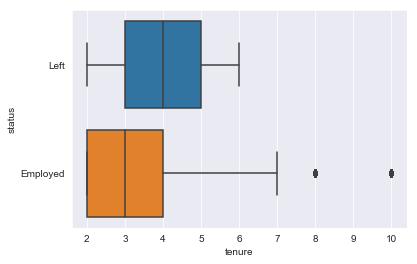

In [12]:
sns.boxplot(y = 'status', x ='tenure' , data = df)
plt.show()

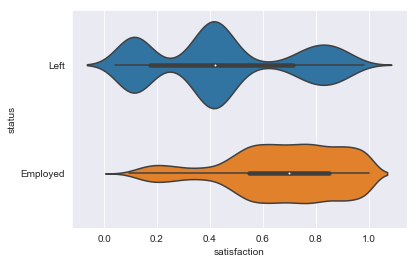

In [13]:
sns.violinplot(y='status', x='satisfaction', data=df)
plt.show()

### Bivariate segmentations

###### Why is it that we're seeing a cluster of highly satisfied employees who are leaving? 
Well, one way to dig into this a bit further is to use bivariate segmentations to see whether there's another factor at play.

>Bivariate segmentations show you the relationship between two numeric features and a categorical one.

###### We can produce bivariate segmentations with the sns.lmplot() function from the Seaborn library.

>sns.lmplot() is essentially a regular scatterplot with additional options.

>For example, we can color each point based on its 'status'.

>To do so, we'll use the hue= argument.

>Note that we're setting scatter_kws={'alpha':0.1} to make the points partially transparent. We need to do this in order to see both classes.

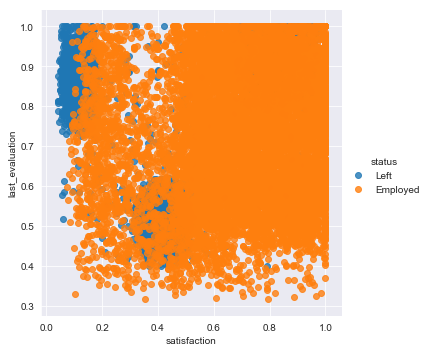

In [14]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           hue='status',
           data=df,
           fit_reg=False)
plt.show()

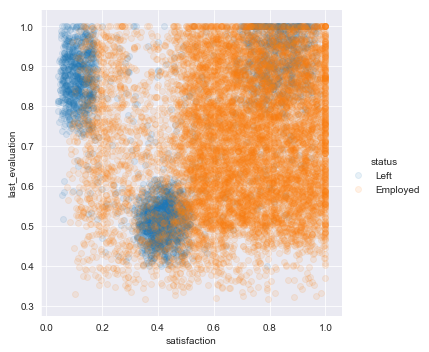

In [15]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

###### This is a bivariate segmentation because we are plotting the relationship between two variables while segmenting classes using color

sometimes this chart is too cluttered. Instead, it might be more helpful to plot a separate scatterplot just for those who've 'Left'.

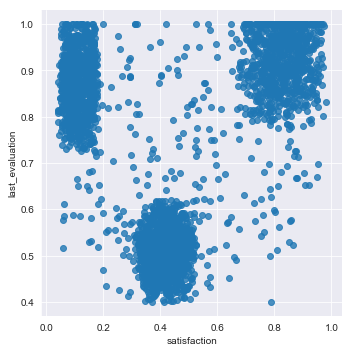

In [16]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

While many machine learning algorithms can learn these automatically, sometimes it helps if we explicitly highlight these clusters.

So let's make a mental note to create 3 indicator features during feature engineering:

>"Underperformers: for last_evaluation < 0.6

>"Unhappy" for satisfaction_level < 0.2... maybe they are overqualified?

>"Overachievers" last_evaluation > 0.8 and satisfaction > 0.7

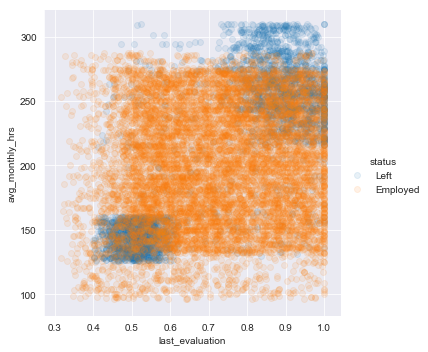

In [17]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs
sns.lmplot(x='last_evaluation',
           y='avg_monthly_hrs',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

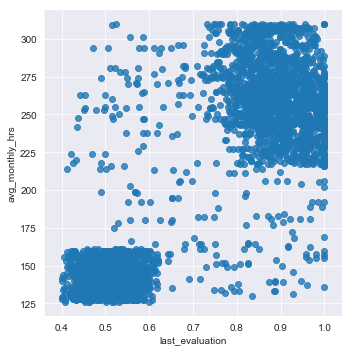

In [18]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs for leavers
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()

#### Does it look like there are clusters of people who left based on these two features? Could we create any new features during feature engineering based on this information?

Again, not all of the features we engineer will need to be winners. As long as we have good reasoning to try them, we can put them in and leave it up to our model training process to perform feature selection.
During feature engineering, we might consider creating two new indicator features:

>'Stars' with avg_monthly_hrs > 215 and last_evaluation > 0.75

>'Slackers' with avg_monthly_hrs < 165 and last_evaluation < 0.65

In [19]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


##### Finally, answer these questions.


Did leavers work more hours per month?

>Yes, on average, leavers worked more hours per month.

On average, were leavers longer tenured?

>On average, leavers were longer tenured.

On average, did leavers have lower evaluations than those who are still employed?

>On average, leavers had higher, not lower, performance evaluations.

What percent of leavers filed a complaint? How about those who are still employed?

>Only 4.6% of leavers filed a complaint compared to 17.5% of those still employed. (This leads us to believe that filing a complaint might be helpful in allowing HR to proactively address problems.)

What percent of leavers were recently promoted? How about those who are still employed?

>Only 0.5% of leavers were recently promoted compared to 2.6% of those still employed.

In [20]:
df.groupby('status').agg(['mean','std'])

avg_monthly_hrs            filed_complaint      last_evaluation  \
                    mean        std            mean  std            mean   
status                                                                     
Employed      197.700286  46.945468             1.0  0.0        0.714479   
Left          206.502948  61.753651             1.0  0.0        0.730706   

                   n_projects           recently_promoted      satisfaction  \
               std       mean       std              mean  std         mean   
status                                                                        
Employed  0.164110   3.755273  1.009113               1.0  0.0     0.675979   
Left      0.197476   3.833137  1.825760               1.0  0.0     0.447500   

                      tenure            
               std      mean       std  
status                                  
Employed  0.218652  3.380245  1.565510  
Left      0.265484  3.869023  0.973084

In [21]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(df.groupby(feature).agg(['mean','std']))
 
    

                       avg_monthly_hrs            filed_complaint       \
                                  mean        std            mean  std   
department                                                               
IT                          202.175711  50.693876             1.0  0.0   
admin                       201.272727  50.063783             1.0  0.0   
engineering                 202.469522  50.492693             1.0  0.0   
finance                     201.175824  51.515619             1.0  0.0   
information_technology      202.167464  46.805712             1.0  0.0   
management                  201.025210  47.422817             1.0  0.0   
marketing                   199.664225  49.361580             1.0  0.0   
procurement                 199.482759  50.138043             1.0  0.0   
product                     199.991860  50.101259             1.0  0.0   
sales                       200.842467  49.628756             1.0  0.0   
support                     200.975495

# IV. CORRELATIONS

In [22]:
correlations = df.corr()

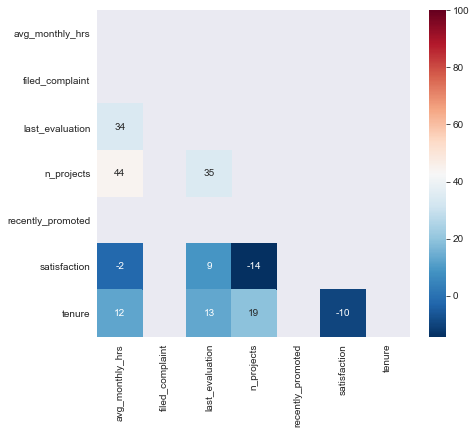

In [23]:
# Make the figsize 9 x 8
plt.figure(figsize=(7,6))

mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=1

sns.heatmap(correlations*100,cmap='RdBu_r' ,annot = True, fmt='.0f',mask=mask )
plt.show()

# ===================== Ad-Hoc Data Cleaning ====================

There are situations where doing a little bit of ad-hoc data cleaning can help your exploratory analysis.

##### Finally, determine which department had the employees who worked the most monthly hours on average.

In [24]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
temp,99.690608,1.0,NaN,1.657459,NaN,NaN,NaN
procurement,199.482759,1.0,0.699205,3.885057,1.0,0.627930,3.264368
marketing,199.664225,1.0,0.715018,3.687424,1.0,0.629122,3.567766
product,199.991860,1.0,0.719616,3.817442,NaN,0.628774,3.487209
sales,200.842467,1.0,0.711254,3.772878,1.0,0.623075,3.527148
support,200.975495,1.0,0.723200,3.804430,1.0,0.626923,3.394910
management,201.025210,1.0,0.729714,3.857143,1.0,0.630428,4.294118
finance,201.175824,1.0,0.723880,3.815934,1.0,0.586787,3.543956
admin,201.272727,1.0,0.726282,3.897727,1.0,0.611450,3.369318


Engineering had the highest average monthly hours worked.

### DROP DUPLICATES

In [25]:
df.shape

(14249, 10)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(14221, 10)

### DROP IRRELEVANT DATA

 we saw that we have temp workers (based on the 'department' feature). However, based on our project scope, we don't want to model temp workers. Let's just double-check.

In [28]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

##### let's remove observations with the 'temp' class for department.

In [29]:
df = df[df.department != 'temp']
df.shape

(14068, 10)

### FIX STRUCTURAL ERRORS

##### 'filed_complaint' and 'recently_promoted' should be indicator variables.

In [30]:
print( df.filed_complaint.unique() )
print( df.recently_promoted.unique() )

[nan  1.]
[nan  1.]


Well, as it currently stands, we won't be able to calculate any correlations using those two features.We can resolve this by fixing those features. They should be indicator variables, so let's fill their missing values with 0.

In [31]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

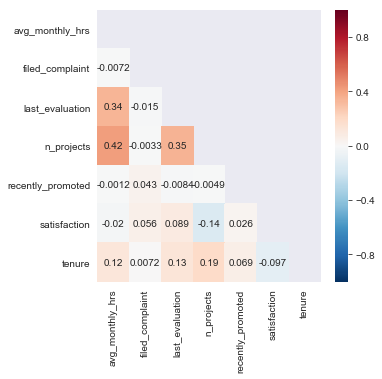

In [32]:
corr = df.corr()

mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=1

plt.figure(figsize=(5,5))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1,mask = mask)
plt.show()

##### Replace any instances of 'information_technology' with 'IT' instead.

In [33]:
df.department.replace('information_technology', 'IT', inplace=True)

##### sanity check, display the bar plot for department distributions again.

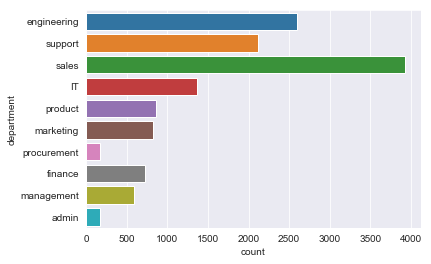

In [34]:
sns.countplot(y = 'department', data = df)
plt.show()

### HANDLE MISSING DATA

In [35]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

##### Label missing values in 'department' as 'Missing'.

In [36]:
# Fill missing values in department with 'Missing'
df['department'].fillna('Missing', inplace=True)

##### let's flag and fill missing numerical features

In [37]:
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

##### simply fill in the original missing value with 0 just so your algorithms can run properly.

In [38]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

#### you are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

In [39]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

In [40]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0


In [41]:
df.shape

(14068, 11)

# ====================== Engineer Features ======================

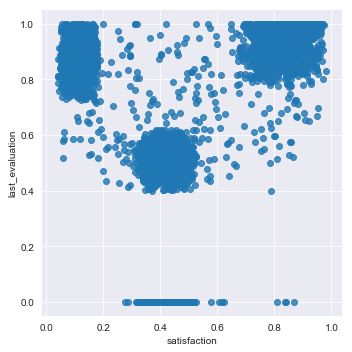

In [42]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

These roughly translate to 3 indicator features we can engineer:

>'underperformer' - last_evaluation < 0.6 and last_evaluation_missing == 0

>'unhappy' - satisfaction_level < 0.2

>'overachiever' - last_evaluation > 0.8 and satisfaction > 0.7

In [43]:
df['underperformer'] = ((df.last_evaluation<0.6) & (df.last_evaluation_missing==0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

##### Sanity check

In [44]:
df[['underperformer','unhappy','overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

### Create Dummy Variables

In [45]:
df.dtypes

avg_monthly_hrs              int64
department                  object
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
salary                      object
satisfaction               float64
status                      object
tenure                     float64
last_evaluation_missing      int32
underperformer               int32
unhappy                      int32
overachiever                 int32
dtype: object

In [46]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(feature,':')
    print(df[feature].unique())
    print()

department :
['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'procurement'
 'finance' 'Missing' 'management' 'admin']

salary :
['low' 'medium' 'high']

status :
['Left' 'Employed']



In [47]:
df = pd.get_dummies(df, columns=['department', 'salary'])
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,Left,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,Employed,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,Employed,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,Employed,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,Employed,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,Employed,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,Employed,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,Employed,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,Employed,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,Employed,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [48]:
df['status'] = df['status'].map({'Employed':0,'Left':1})

In [49]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Save analytical base table

In [50]:
df.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 3\\Project 3 Workbook Bundle\\project_files\\My files\\analytical_base_table.csv', index=None)